In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [37]:
all = pd.read_excel('анализ.xlsx')

In [38]:
all_calls = len(all.index)
all_calls

89172

In [39]:
answered_calls = len(all[(all['hit_status_result_desc'] == 'Дозвон, Отказ') |
    (all['hit_status_result_desc'] == 'Дозвон, Успешно') |
    (all['hit_status_result_desc'] == 'Дозвон, Перезвонить') |
    (all['hit_status_result_desc'] == 'Дозвон, Отложить')].index)
answered_calls

38555

In [40]:
answered_calls/all_calls

0.43236666218095365

### Анализ операторов 

In [41]:
table_results = pd.pivot_table(all, index='agent_login', values = 'wo_employee_rk',
                       columns=['hit_status_result_desc'], aggfunc='count')

In [42]:
table_results

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон
agent_login,,,,,,,
0018lash,NaN,NaN,NaN,3.0,2.0,NaN,3.0
0033makn,NaN,21.0,4.0,14.0,NaN,NaN,80.0
0036gkar,NaN,15.0,3.0,5.0,3.0,NaN,21.0
0062mgme,NaN,8.0,2.0,11.0,1.0,NaN,1.0
0080ovma,NaN,NaN,NaN,84.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
zyanezhr,NaN,20.0,2.0,20.0,2.0,NaN,62.0
zyannash,NaN,8.0,1.0,14.0,2.0,NaN,55.0
zyannosh,NaN,NaN,NaN,NaN,NaN,NaN,59.0


#### Заполнение 0 всех nan значений

In [43]:
def fill_column_held_up_phone(row):
    result = 0
    if pd.notnull(row['Дозвон, Отказ']):
        result+=row['Дозвон, Отказ']
    if pd.notnull(row['Дозвон, Успешно']):
        result+=row['Дозвон, Успешно']
    if pd.notnull(row['Дозвон, Перезвонить']):
        result+=row['Дозвон, Перезвонить']
    if pd.notnull(row['Дозвон, Отложить']):
        result+=row['Дозвон, Отложить']
    return result

def fill_column_calls_all_count(row):
    result = 0
    if pd.notnull(row['Дозвон, Отказ']):
        result+=row['Дозвон, Отказ']
    if pd.notnull(row['Дозвон, Успешно']):
        result+=row['Дозвон, Успешно']
    if pd.notnull(row['Дозвон, Перезвонить']):
        result+=row['Дозвон, Перезвонить']
    if pd.notnull(row['Дозвон, Отложить']):
        result+=row['Дозвон, Отложить']
    if pd.notnull(row['Дозвон, Некорректное задание по звонку']):
        result+=row['Дозвон, Некорректное задание по звонку']
    if pd.notnull(row['Не было звонка']):
        result+=row['Не было звонка']
    if pd.notnull(row['Недозвон']):
        result+=row['Недозвон']
    return result

In [44]:
table_results['Всего звонков'] = table_results.apply(fill_column_calls_all_count, axis=1)

In [45]:
table_results['Дозвон'] = table_results.apply(fill_column_held_up_phone, axis=1)

In [46]:
table_results

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон,Всего звонков,Дозвон
agent_login,,,,,,,,,
0018lash,NaN,NaN,NaN,3.0,2.0,NaN,3.0,8.0,5.0
0033makn,NaN,21.0,4.0,14.0,NaN,NaN,80.0,119.0,39.0
0036gkar,NaN,15.0,3.0,5.0,3.0,NaN,21.0,47.0,26.0
0062mgme,NaN,8.0,2.0,11.0,1.0,NaN,1.0,23.0,22.0
0080ovma,NaN,NaN,NaN,84.0,NaN,NaN,NaN,84.0,84.0
...,...,...,...,...,...,...,...,...,...
zyanezhr,NaN,20.0,2.0,20.0,2.0,NaN,62.0,106.0,44.0
zyannash,NaN,8.0,1.0,14.0,2.0,NaN,55.0,80.0,25.0
zyannosh,NaN,NaN,NaN,NaN,NaN,NaN,59.0,59.0,0.0


### Ищем результативность операторов

In [47]:
table_results['Результативность'] = round((table_results['Дозвон, Успешно'] / table_results['Дозвон'] * 100), 0)

In [48]:
table_results['Результативность'].isna().sum()

674

In [49]:
table_results.fillna(0, inplace=True)

In [50]:
table_results

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон,Всего звонков,Дозвон,Результативность
agent_login,,,,,,,,,,
0018lash,0.0,0.0,0.0,3.0,2.0,0.0,3.0,8.0,5.0,40.0
0033makn,0.0,21.0,4.0,14.0,0.0,0.0,80.0,119.0,39.0,0.0
0036gkar,0.0,15.0,3.0,5.0,3.0,0.0,21.0,47.0,26.0,12.0
0062mgme,0.0,8.0,2.0,11.0,1.0,0.0,1.0,23.0,22.0,5.0
0080ovma,0.0,0.0,0.0,84.0,0.0,0.0,0.0,84.0,84.0,0.0
...,...,...,...,...,...,...,...,...,...,...
zyanezhr,0.0,20.0,2.0,20.0,2.0,0.0,62.0,106.0,44.0,5.0
zyannash,0.0,8.0,1.0,14.0,2.0,0.0,55.0,80.0,25.0,8.0
zyannosh,0.0,0.0,0.0,0.0,0.0,0.0,59.0,59.0,0.0,0.0


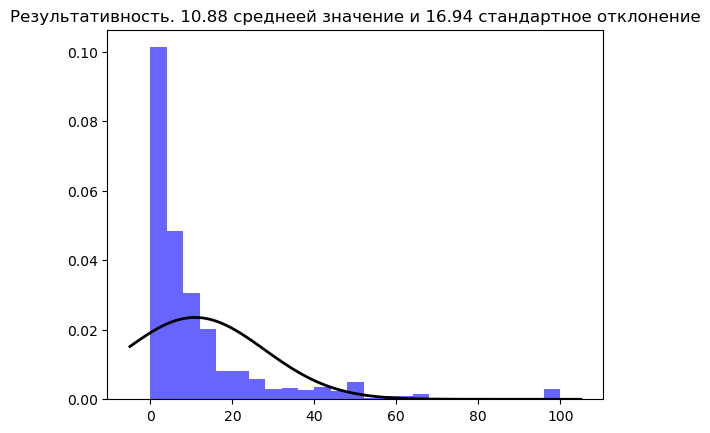

In [51]:
efficiency = table_results['Результативность']
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(efficiency) 
  
# Plot the histogram.
plt.hist(efficiency, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Результативность. {:.2f} среднеей значение и {:.2f} стандартное отклонение".format(mu, std)
plt.title(title)
  
plt.show()

In [52]:
table_results['Результативность'].median()

5.0

In [58]:
table_results.head(5)

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон,Всего звонков,Дозвон,Результативность,QuantileRank
agent_login,,,,,,,,,,,
0018lash,0.0,0.0,0.0,3.0,2.0,0.0,3.0,8.0,5.0,40.0,"(20.0, 100.0]"
0033makn,0.0,21.0,4.0,14.0,0.0,0.0,80.0,119.0,39.0,0.0,NaN
0036gkar,0.0,15.0,3.0,5.0,3.0,0.0,21.0,47.0,26.0,12.0,"(10.0, 20.0]"
0062mgme,0.0,8.0,2.0,11.0,1.0,0.0,1.0,23.0,22.0,5.0,"(1.999, 6.0]"
0080ovma,0.0,0.0,0.0,84.0,0.0,0.0,0.0,84.0,84.0,0.0,NaN


### Делим операторов, которые что-то продали, на квартили и определяем 25% нахудших

In [71]:
not_zero_result = table_results[table_results['Результативность'] != 0]
table_results['QuantileRank'] = pd.qcut(not_zero_result['Результативность'], 4)

In [72]:
table_results['QuantileRank'].value_counts()

(1.999, 6.0]     414
(20.0, 100.0]    298
(10.0, 20.0]     293
(6.0, 10.0]      283
Name: QuantileRank, dtype: int64

In [73]:
table_results['QuantileRank'] = table_results['QuantileRank'].astype("str")

In [74]:
first25 = table_results[table_results['QuantileRank'] == '(1.999, 6.0]']
len(first25)

414

### Определяем операторов, которые сильно отличаются от других

### Давайте сделаем нашу выборку результативности нормальной, используя центральную предельную теорему, и далее найдем 1 и 100 процентили. То есть мы найдем, какие значения располагаются в пределах трех стандартных отклонений. Значения меньше 1 процентиля и больше 100 процентиля будут выбросами
ЦПТ: Средние выборок будут распределены относительно среднего совокупности примерно по нормальному закону. 

100%|██████████| 100000/100000 [00:05<00:00, 18045.80it/s]


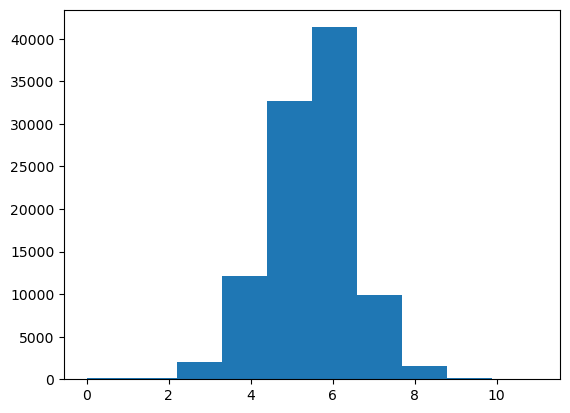

3.0 11.0


In [87]:
np.random.seed(1)
all_values = table_results['Результативность']

sample_mean_values = []

for i in tqdm(range(100000)):
    sample_n = np.random.choice(all_values, size=100)
    sample_mean_values.append(np.median(sample_n))

plt.hist(sample_mean_values)
plt.show()
print(round(np.percentile(sample_mean_values, 1),2), round(np.percentile(sample_mean_values, 100), 2))

#### Проверка на нормальность распределения:

In [91]:
from scipy.stats import shapiro
stat, p_value = shapiro(all_values)
print(f'stat={stat}, p-value={p_value}')

alpha = 0.05
if p_value < alpha:
    print('Ура, распределение нормальное!')
else:
    print('Блин, распределение ненормальное!')

stat=0.6511039137840271, p-value=0.0
Ура, распределение нормальное!
